## Q1. Identify and rectify the eight prominent data quality issues present in the given datasets.

- [x] Find Nulls/NANs by using the extra column provided(Youtubelikesdislikes).
- [x] Change the data types of dislikes and likes to int.
- [x] Remove Cr prefix and suffix for budjet and box office collection.
- [x] Genre has inconsistent data like some of values has suffix “Genre”.
- [x] Release time column can have values from 1 to 4. Bobby Jasoos as 44.
- [x] Remove YoutubeLikeDislikes column as doesn't make any sense.
- [x] Clean the Release date row.
- [x] Remove Duplicates.
- [x] Checked for Outliers.

In [1]:
import pandas as pd  # pandas module for data manipulation
import re # Regular expression operations
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # another module for plotting

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# let's load the first bollywood dataset
b1 = pd.read_csv('bollywood.csv')
# let's inspect the first 5 rows
b1.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736


In [3]:
# Checking the datatypes. so that we can modify them according to other dataset.
b1.dtypes

No                       int64
RelDate                 object
MovieName               object
ReleaseTime              int64
Genre                   object
Budget                  object
BoxOfficeCollection     object
YoutubeViews             int64
YoutubeLikes           float64
YoutubeDislikes        float64
YoutubeLikeDislikes      int64
dtype: object

In [4]:
# let's load the bollywood2 dataset
b2 = pd.read_csv('bollywood - 2.csv')
# let's inspect the first 5 rows
b2.head()

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16,2.50,3998331,2307,497
1,52,22-Mar-13,Aatma,N,Thriller,8,8.78,841891,997,306
2,53,4-Apr-14,Main Tera Hero,LW,Comedy,40,55.00,4903941,12657,2139
3,54,22-Mar-13,Sona Spa,N,Thriller,10,0.24,79430,61,112
4,55,29-Mar-13,Himmatwala,N,Action,50,100.00,2501277,1,1


In [5]:
b2

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16,2.50,3998331,2307,497
1,52,22-Mar-13,Aatma,N,Thriller,8,8.78,841891,997,306
2,53,4-Apr-14,Main Tera Hero,LW,Comedy,40,55.00,4903941,12657,2139
3,54,22-Mar-13,Sona Spa,N,Thriller,10,0.24,79430,61,112
4,55,29-Mar-13,Himmatwala,N,Action,50,100.00,2501277,1,1
5,56,9-May-14,Manjunath,HS,Drama,3,1.75,370106,991,35
6,57,22-Aug-14,Mardaani,N,Drama,15,36.00,4376650,14408,1035
7,58,5-Apr-13,Chashme Baddoor,N,Comedy,20,42.00,166066,2897,283
8,59,5-Sep-14,Mary Kom,N,Drama,15,104.00,6086811,26560,1647
9,60,12-Apr-13,Nautanki Saala,LW,Comedy,9,21.50,1208841,1442,342


In [6]:
# Checking the datatypes. so that we can modify them according to other dataset.
b2.dtypes

Movie_ID                   int64
Release_Date              object
Movie_Name                object
Release_Time              object
Genre                     object
BudgetCr                   int64
BoxOfficeCollectionCr    float64
Youtube_Views              int64
Youtube_Likes              int64
Youtube_Dislikes           int64
dtype: object

### Second set looks better and more cleaner.So, let's concentrate on First dataset first.

**1. Find Nulls/NANs and eliminate**

In [7]:
# we can quantify the total number of missing values using
# the isnull method plus the sum method on the dataframe
b1.isna().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           1
YoutubeDislikes        3
YoutubeLikeDislikes    0
dtype: int64

In [8]:
# Replacing NAN with the help of other column YoutubeLikeDislikes
b1['YoutubeLikes'].fillna(b1['YoutubeLikeDislikes']-b1['YoutubeDislikes'], inplace=True)
b1['YoutubeDislikes'].fillna(b1['YoutubeLikeDislikes']-b1['YoutubeLikes'], inplace=True)

**2. Casting likes and dislikes to int from float as likes and dislikes need not be float.**

In [9]:
# Casting likes and dislikes to int from float as likes and dislikes can't be float.
b1['YoutubeLikes'] = b1['YoutubeLikes'].astype(int)
b1['YoutubeDislikes'] = b1['YoutubeDislikes'].astype(int)
# Verifying whether the datatype got changed or not
b1.dtypes

No                      int64
RelDate                object
MovieName              object
ReleaseTime             int64
Genre                  object
Budget                 object
BoxOfficeCollection    object
YoutubeViews            int64
YoutubeLikes            int64
YoutubeDislikes         int64
YoutubeLikeDislikes     int64
dtype: object

**3. Remove Cr prefix and suffix for budget and box office collection**

In [10]:
# Remove Cr prefix and suffix for budjet and box office collection
b1['Budget'] = b1['Budget'].str.extract('(\d+)', expand=False).astype(int)
b1['BoxOfficeCollection'] = b1['BoxOfficeCollection'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
b1

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,1,Apr-18-2014,2 States,3,RomanceGenre,36,104.00,8576361,26622,2527,29149
1,2,Jan-4-2013,Table No. 21,4,Thriller,10,12.00,1087320,1129,137,1266
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10,4.00,572336,586,54,640
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7,383.00,42626,86,19,105
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18,10.80,3113427,4512,1224,5736
5,6,May-30-2014,Citylights,2,DramaGenre,7,35.00,1076591,1806,84,1890
6,7,Sqp-19-2014,Daawat-E-Ishq,4,ComedyGenre,30,24.60,3905050,8315,1373,9688
7,8,Jan-11-2013,Matru Ki Bijlee Ka Mandola,4,ComedyGenre,33,40.00,2435283,4326,647,4973
8,9,Jan-10-2014,Dedh Ishqiya,3,ComedyGenre,31,27.00,2333067,2436,591,3027
9,10,Jan-11-2013,Gangoobai,4,DramaGenre,2,0.01,4354,1,1,2


**4. Genre has inconsistent data like some of values has suffix “Genre”**

In [11]:
# removign Genre string from column "Genre" 
b1['Genre'] = b1['Genre'].str.replace('Genre', '').str.strip()
print("total values: ",b1.Genre.value_counts().sum())
b1.Genre.value_counts()
# So, the sum of all the genres are eqaul to total rows in dataset.
# we can confirm every row got trimmed

total values:  51


Drama       12
Comedy      12
Action      10
Romance      9
Thriller     8
Name: Genre, dtype: int64

**5. Release time column can have values from 1 to 4. Bobby Jasoos as 44**

In [12]:
b1

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,1,Apr-18-2014,2 States,3,Romance,36,104.00,8576361,26622,2527,29149
1,2,Jan-4-2013,Table No. 21,4,Thriller,10,12.00,1087320,1129,137,1266
2,3,Jul-18-2014,Amit Sahni Ki List,4,Comedy,10,4.00,572336,586,54,640
3,4,Jan-4-2013,Rajdhani Express,4,Drama,7,383.00,42626,86,19,105
4,5,Jul-4-2014,Bobby Jasoos,44,Comedy,18,10.80,3113427,4512,1224,5736
5,6,May-30-2014,Citylights,2,Drama,7,35.00,1076591,1806,84,1890
6,7,Sqp-19-2014,Daawat-E-Ishq,4,Comedy,30,24.60,3905050,8315,1373,9688
7,8,Jan-11-2013,Matru Ki Bijlee Ka Mandola,4,Comedy,33,40.00,2435283,4326,647,4973
8,9,Jan-10-2014,Dedh Ishqiya,3,Comedy,31,27.00,2333067,2436,591,3027
9,10,Jan-11-2013,Gangoobai,4,Drama,2,0.01,4354,1,1,2


In [13]:
# Release time column can have values from 1 to 4. Bobby Jasoos as 44
b1['ReleaseTime'] = b1['ReleaseTime'].replace(44,4)

**6. Remove YoutubeLikeDislikes column as doesn't make any sense**

In [14]:
# Remove YoutubeLikeDislikes column as doesn't make any sense. 
# we can later get this by summing up the likes and dislikes
b1.pop('YoutubeLikeDislikes');
b1

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,Apr-18-2014,2 States,3,Romance,36,104.00,8576361,26622,2527
1,2,Jan-4-2013,Table No. 21,4,Thriller,10,12.00,1087320,1129,137
2,3,Jul-18-2014,Amit Sahni Ki List,4,Comedy,10,4.00,572336,586,54
3,4,Jan-4-2013,Rajdhani Express,4,Drama,7,383.00,42626,86,19
4,5,Jul-4-2014,Bobby Jasoos,4,Comedy,18,10.80,3113427,4512,1224
5,6,May-30-2014,Citylights,2,Drama,7,35.00,1076591,1806,84
6,7,Sqp-19-2014,Daawat-E-Ishq,4,Comedy,30,24.60,3905050,8315,1373
7,8,Jan-11-2013,Matru Ki Bijlee Ka Mandola,4,Comedy,33,40.00,2435283,4326,647
8,9,Jan-10-2014,Dedh Ishqiya,3,Comedy,31,27.00,2333067,2436,591
9,10,Jan-11-2013,Gangoobai,4,Drama,2,0.01,4354,1,1


**7. Clean the Release date row**

In [15]:
# b1["RelDate"] = pd.to_datetime(b1["RelDate"]).dt.strftime("%m/%d/%y")
# The above code gives error at each invalid date and halts the execution.
# we have to execute many times to correct all invalid dates.


# the below code gives you all the invalid dates and you can correct them one by one.
import sys
for date in b1['RelDate']:
   try:
       pd.to_datetime(date)
   except :
       print(date ,"expection :",sys.exc_info()[0])

Sqp-19-2014 expection : <class 'dateutil.parser._parser.ParserError'>
Jum-27-2014 expection : <class 'dateutil.parser._parser.ParserError'>
juu-6-2014 expection : <class 'dateutil.parser._parser.ParserError'>
Feb-21-204 expection : <class 'pandas._libs.tslibs.np_datetime.OutOfBoundsDatetime'>


In [16]:
# As it is straight forward observation that is spelling mistake, renaming it.
b1['RelDate'] = b1['RelDate'].str.replace('Sqp-19-2014', 'Sep-19-2014')

In [17]:
# checking the movie name at this row.
b1.loc[b1['RelDate'] == 'juu-6-2014', 'MovieName']

17    Filmistaan
Name: MovieName, dtype: object

*So by using internet we got to know that the movie Filmstaan got released on June 6th 2014.*<br />
*So, I'm gonna change the juu to Jun*

In [18]:
# updating juu-6-2014 to jun-6-2014
b1['RelDate'] = b1['RelDate'].str.replace('juu-6-2014', 'Jun-6-2014')

In [19]:
# checking the movie name at this row.
b1.loc[b1['RelDate'] == 'Jum-27-2014', 'MovieName']

12    Ek Villain
Name: MovieName, dtype: object

*So by using internet we got to know that the movie Ek Villain got released on Jun-27-2014.* <br />
*So, I'm gonna change the Jum to Jun*

In [20]:
# updating Jum-27-2014 to Jun-27-2014
b1['RelDate'] = b1['RelDate'].str.replace('Jum-27-2014', 'Jun-27-2014')
# Assuming istead of 2014 its 204.so replacing Feb-21-204 to Feb-21-2014
b1['RelDate'] = b1['RelDate'].str.replace('Feb-21-204', 'Feb-21-2014')

In [21]:
b1["RelDate"] = pd.to_datetime(b1["RelDate"]).dt.strftime("%d-%b-%y")
b1

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,3,Romance,36,104.00,8576361,26622,2527
1,2,04-Jan-13,Table No. 21,4,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,4,Comedy,10,4.00,572336,586,54
3,4,04-Jan-13,Rajdhani Express,4,Drama,7,383.00,42626,86,19
4,5,04-Jul-14,Bobby Jasoos,4,Comedy,18,10.80,3113427,4512,1224
5,6,30-May-14,Citylights,2,Drama,7,35.00,1076591,1806,84
6,7,19-Sep-14,Daawat-E-Ishq,4,Comedy,30,24.60,3905050,8315,1373
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,4,Comedy,33,40.00,2435283,4326,647
8,9,10-Jan-14,Dedh Ishqiya,3,Comedy,31,27.00,2333067,2436,591
9,10,11-Jan-13,Gangoobai,4,Drama,2,0.01,4354,1,1


**Its time to merge both the datasets.**<br />
*In order to merge we have to follow certain steps.*<br />
1. Correct the data in each columns in the dataset separately.
2. Make the column names match each other.
3. Merge the dataset.
4. Check for duplicates in the movie name column.
5. Then apply the logic to get the required results

In [22]:
# So, first thing I'm doing is to make the both datasets contain similar data for respective column
# Replacing with bollywood 1 dataset values for Release_Time
b2['Release_Time'] = b2['Release_Time'].map({'FS': '1', 'HS': '2','LW': '3', 'N': '4'})
b2.dtypes
# b2

Movie_ID                   int64
Release_Date              object
Movie_Name                object
Release_Time              object
Genre                     object
BudgetCr                   int64
BoxOfficeCollectionCr    float64
Youtube_Views              int64
Youtube_Likes              int64
Youtube_Dislikes           int64
dtype: object

In [23]:
# now changing the data type of column
b2['Release_Time'] = b2['Release_Time'].astype(str).astype(int)
# print(b2.dtypes)
# print(b1.dtypes)


In [24]:
# check the column names of b2
b2.columns

Index(['Movie_ID', 'Release_Date', 'Movie_Name', 'Release_Time', 'Genre',
       'BudgetCr', 'BoxOfficeCollectionCr', 'Youtube_Views', 'Youtube_Likes',
       'Youtube_Dislikes'],
      dtype='object')

In [25]:
# check the column names of b1
b1.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

In [26]:
# Rename the column names according to b1
b2.rename(columns={'Movie_ID':'No','Release_Date':'RelDate', 'Movie_Name':'MovieName','Release_Time':'ReleaseTime','BudgetCr':'Budget',
                  'BoxOfficeCollectionCr':'BoxOfficeCollection','Youtube_Views':'YoutubeViews','Youtube_Likes':'YoutubeLikes',
                   'Youtube_Dislikes':'YoutubeDislikes'}, 
                 inplace=True)

In [27]:
# verify the changes
b2.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

In [28]:
# mergint the two datasets as dataset bollywood
bollywood = pd.concat([b1,b2], ignore_index=True)
bollywood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   150 non-null    int64  
 1   RelDate              150 non-null    object 
 2   MovieName            150 non-null    object 
 3   ReleaseTime          150 non-null    int64  
 4   Genre                150 non-null    object 
 5   Budget               150 non-null    int64  
 6   BoxOfficeCollection  150 non-null    float64
 7   YoutubeViews         150 non-null    int64  
 8   YoutubeLikes         150 non-null    int64  
 9   YoutubeDislikes      150 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 11.8+ KB


**8. dropping ALL duplicte values**

In [29]:
# dropping ALL duplicte values 
bollywood.drop_duplicates(subset ="MovieName", 
                     keep = "last", inplace = True)
bollywood

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,3,Romance,36,104.00,8576361,26622,2527
1,2,04-Jan-13,Table No. 21,4,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,4,Comedy,10,4.00,572336,586,54
3,4,04-Jan-13,Rajdhani Express,4,Drama,7,383.00,42626,86,19
4,5,04-Jul-14,Bobby Jasoos,4,Comedy,18,10.80,3113427,4512,1224
5,6,30-May-14,Citylights,2,Drama,7,35.00,1076591,1806,84
6,7,19-Sep-14,Daawat-E-Ishq,4,Comedy,30,24.60,3905050,8315,1373
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,4,Comedy,33,40.00,2435283,4326,647
8,9,10-Jan-14,Dedh Ishqiya,3,Comedy,31,27.00,2333067,2436,591
9,10,11-Jan-13,Gangoobai,4,Drama,2,0.01,4354,1,1


**Checking Outliers after merging** <br />
*Here we are just checking outliers because we don't have a specific model.<br />
If we have a model then we can remove outliers. Now in this situation we don't what's the future requirement. <br />
So didn't remove outliers.*

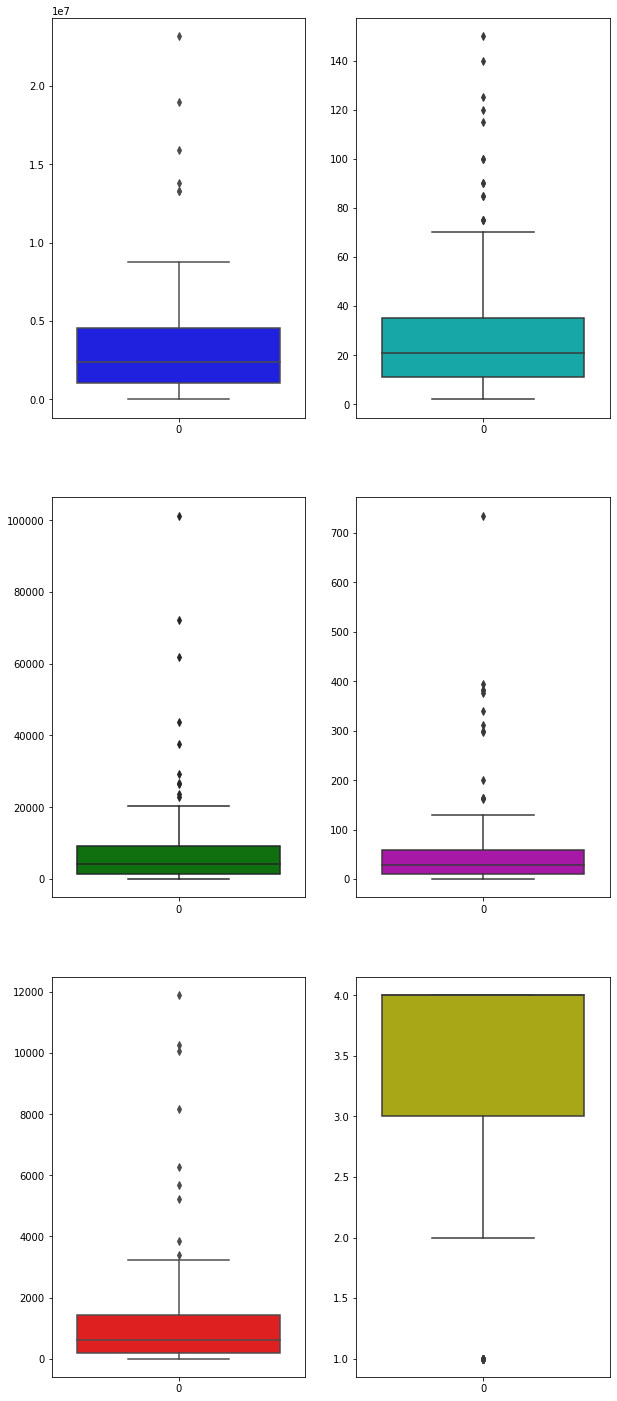

In [62]:
# Creating a seperate dataframe for necessary values those can be plotted.
plotdf = bollywood[["YoutubeViews","YoutubeLikes","YoutubeDislikes","Budget","BoxOfficeCollection","ReleaseTime"]].copy();
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink']

# defining the plot area into 3 rows and 2 columns with each plot size with 10x10 size.
# sharex=False represents, they don't share the common X axis.
# precisely, every feature's x-axis is independent of itself
f, axes = plt.subplots(3, 2, figsize=(10, 25), sharex=False)
for i, feature in enumerate(plotdf.columns):
    # boxplot takes first argument as column name data of dataset to represent the graph
    # color here is displayed using Array
    # ax specifies the plot block where it needs to get rendered.
    sns.boxplot(data = plotdf[feature] , color=colors[i], ax=axes[i%3, i//3])

### Q2. How many records are present in the dataset?

In [31]:
bollywood.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   149 non-null    int64  
 1   RelDate              149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    int64  
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 12.8+ KB


### Q3. How many movies in each genre got released in different release times?   

In [32]:
bollywood.groupby(["Genre","ReleaseTime"],as_index=False)["MovieName"].size ().reset_index(name="No.of Movies")

,Genre,ReleaseTime,No.of Movies
0,Drama,1,2
1,Drama,2,3
2,Drama,4,18
3,Action,1,3
4,Action,2,3
5,Action,3,3
6,Action,4,15
7,Comedy,1,3
8,Comedy,2,5
9,Comedy,3,5


### Q4.Which month of the year, maximum movie releases are seen?

In [33]:
# creating two more columns for only month and only year
bollywood["MovieMonth"] = pd.DatetimeIndex(bollywood["RelDate"]).month
bollywood["MovieYear"] = pd.DatetimeIndex(bollywood["RelDate"]).year

In [34]:
# grouping by year and month
max_movies_df = bollywood.groupby(["MovieYear","MovieMonth"],as_index=False)["MovieName"].size().reset_index(name="MAXMovies")
# max_movies_df

In [35]:
max_movies_df.loc[max_movies_df.groupby(["MovieYear"])['MAXMovies'].transform("max") == max_movies_df["MAXMovies"]]

,MovieYear,MovieMonth,MAXMovies
6,2013,7,9
15,2014,5,12
23,2015,1,5


### Q5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [36]:
temp=bollywood[bollywood["Budget"]>=25.0]


In [37]:
budget_movies_df = temp.groupby(["MovieYear","MovieMonth"],as_index=False).size().reset_index(name="count")

# This way we can get only one among 3. 
# budget_movies_df.loc[budget_movies_df.groupby(["MovieYear"])['count'].idxmax()] 
# So used transforms to get all the month's data with high budget.
budget_movies_df.loc[budget_movies_df.groupby("MovieYear")['count'].transform("max") == budget_movies_df["count"]]


,MovieYear,MovieMonth,count
5,2013,7,5
11,2014,2,4
12,2014,3,4
13,2014,4,4
22,2015,1,3


### Q6. Which are the top 10 movies with maximum return of investment (ROI)?

In [38]:
bollywood['ROI'] = (bollywood['BoxOfficeCollection'] - bollywood['Budget'])/bollywood['Budget']
bollywood = bollywood.sort_values("ROI",ascending=False)
# bollywood.info()
bollywood[["RelDate","MovieName","Budget","BoxOfficeCollection","ROI"]].head(10)

,RelDate,MovieName,Budget,BoxOfficeCollection,ROI
3,04-Jan-13,Rajdhani Express,7,383.0,53.714286
65,26-Apr-13,Aashiqui 2,12,110.0,8.166667
90,19-Dec-14,PK,85,735.0,7.647059
133,13-Sep-13,Grand Masti,35,298.0,7.514286
136,20-Sep-13,The Lunchbox,10,85.0,7.500000
88,14-Jun-13,Fukrey,5,36.2,6.240000
59,5-Sep-14,Mary Kom,15,104.0,5.933333
129,18-Oct-13,Shahid,6,40.0,5.666667
37,11-Jul-14,Humpty Sharma Ki Dulhania,20,130.0,5.500000
102,12-Jul-13,Bhaag Milkha Bhaag,30,164.0,4.466667
